# Training Models
## Linear Regression
### The Normal Equation

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 *X + np.random.randn(100, 1)

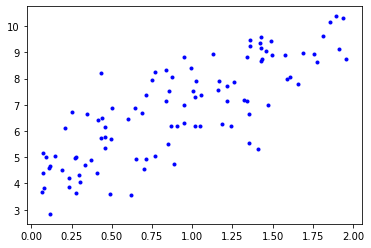

In [8]:
plt.plot(X, y, 'b.')
plt.show()

#### Using Formula

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.26340526],
       [2.77886341]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.26340526],
       [9.82113208]])

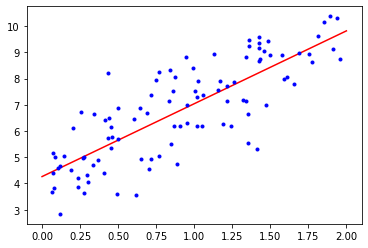

In [11]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.show()

#### Using Sklearn

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.26340526]), array([[2.77886341]]))

In [13]:
lin_reg.predict(X_new)

array([[4.26340526],
       [9.82113208]])

#### Direct SVD

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26340526],
       [2.77886341]])

#### Pseudo inverse

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.26340526],
       [2.77886341]])

### Gradient Descent

In [17]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.26340526],
       [2.77886341]])

#### Stochastic Gradient Descent

In [20]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.28798844],
       [2.8282779 ]])

##### Sklearn SGD

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89855567]), array([3.12133563]))